<a href="https://colab.research.google.com/github/Rafe2001/Face_Mask_Detection_using_CNN/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 97% 158M/163M [00:00<00:00, 184MB/s]
100% 163M/163M [00:00<00:00, 188MB/s]


In [8]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

data  drive  face-mask-dataset.zip  sample_data


In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir("/content/data/with_mask")
print(with_mask_files[:5])
print(with_mask_files[-5:])

['with_mask_3498.jpg', 'with_mask_3188.jpg', 'with_mask_1163.jpg', 'with_mask_423.jpg', 'with_mask_2226.jpg']
['with_mask_1980.jpg', 'with_mask_3407.jpg', 'with_mask_2606.jpg', 'with_mask_30.jpg', 'with_mask_3107.jpg']


In [12]:
without_mask_files = os.listdir("/content/data/without_mask")
print(without_mask_files[:5])
print(without_mask_files[-5:])

['without_mask_3755.jpg', 'without_mask_202.jpg', 'without_mask_26.jpg', 'without_mask_756.jpg', 'without_mask_1984.jpg']
['without_mask_892.jpg', 'without_mask_2091.jpg', 'without_mask_2653.jpg', 'without_mask_540.jpg', 'without_mask_439.jpg']


In [13]:
print('Number of people with mask:',len(with_mask_files))
print('Number of people with mask:',len(without_mask_files))

Number of people with mask: 3725
Number of people with mask: 3828


**Creating Labels for the two classes of Images**


*   with mask --> 1
*   without mask --> 0



In [14]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])
print(len(with_mask_files))
print(len(without_mask_files))

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])

7553
[1, 1, 1, 1, 1]


###Displaying the Images

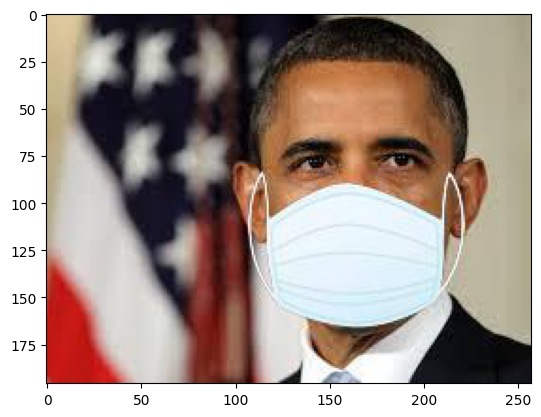

In [17]:
img = mpimg.imread('/content/data/with_mask/with_mask_1004.jpg')
imgplot = plt.imshow(img)
plt.show()

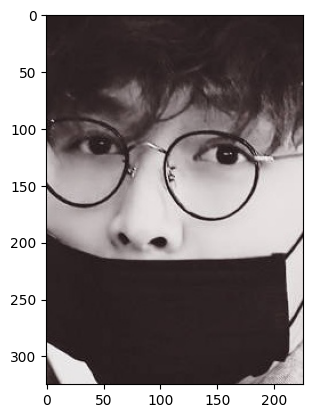

In [18]:
img = mpimg.imread('/content/data/with_mask/with_mask_1011.jpg')
imgplot = plt.imshow(img)
plt.show()

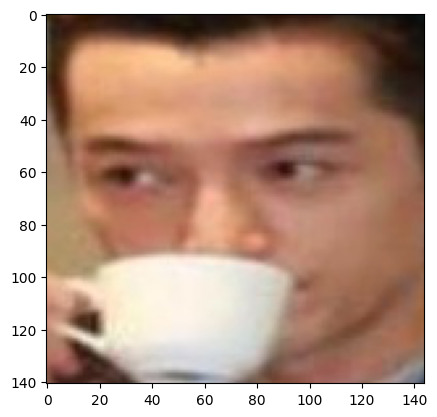

In [19]:
img = mpimg.imread('/content/data/without_mask/without_mask_1002.jpg')
imgplot = plt.imshow(img)
plt.show()

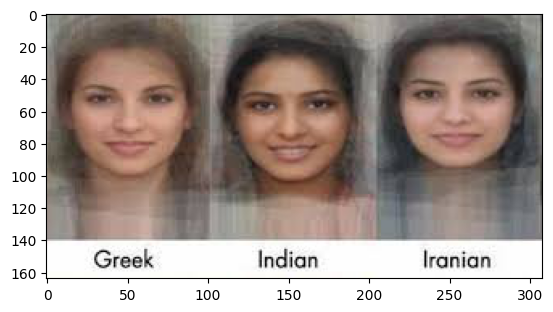

In [20]:
img = mpimg.imread('/content/data/without_mask/without_mask_2025.jpg')
imgplot = plt.imshow(img)
plt.show()

###Image processing

In [21]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
print(type(data))
print(len(data))

<class 'list'>
7553


In [23]:
data[0]

array([[[203, 185, 171],
        [202, 184, 170],
        [203, 185, 170],
        ...,
        [171, 146, 129],
        [170, 142, 122],
        [171, 140, 119]],

       [[201, 183, 169],
        [202, 184, 170],
        [203, 186, 170],
        ...,
        [170, 145, 128],
        [168, 140, 119],
        [169, 138, 117]],

       [[200, 183, 167],
        [201, 184, 168],
        [202, 185, 169],
        ...,
        [168, 143, 126],
        [167, 139, 119],
        [168, 138, 116]],

       ...,

       [[180, 125,  86],
        [144,  82,  48],
        [137,  78,  43],
        ...,
        [162, 130, 104],
        [192, 169, 153],
        [194, 163, 141]],

       [[173, 113,  75],
        [136,  75,  41],
        [137,  79,  44],
        ...,
        [138, 101,  82],
        [198, 174, 157],
        [189, 157, 135]],

       [[166, 104,  65],
        [139,  76,  40],
        [142,  83,  49],
        ...,
        [130,  91,  69],
        [199, 175, 157],
        [188, 155, 135]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# Converting image list and label list to numpy array
X = np.array(data)
y = np.array(labels)

In [27]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


In [28]:
print(y)

[1 1 1 ... 0 0 0]


###Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [30]:
print(X_train.shape,X_test.shape, X.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3) (7553, 128, 128, 3)


In [31]:
X_train_Scaled = X_train / 255
X_test_Scaled = X_test / 255

In [32]:
X_train_Scaled[0]

array([[[0.31372549, 0.28235294, 0.2745098 ],
        [0.25882353, 0.22745098, 0.21960784],
        [0.20784314, 0.17647059, 0.17254902],
        ...,
        [0.14901961, 0.13333333, 0.12156863],
        [0.13333333, 0.1254902 , 0.11372549],
        [0.1372549 , 0.13333333, 0.1254902 ]],

       [[0.30196078, 0.26666667, 0.25882353],
        [0.2627451 , 0.23137255, 0.22352941],
        [0.22352941, 0.19215686, 0.18823529],
        ...,
        [0.14901961, 0.13333333, 0.12156863],
        [0.1372549 , 0.1254902 , 0.11372549],
        [0.12941176, 0.12156863, 0.11764706]],

       [[0.26666667, 0.24313725, 0.23137255],
        [0.25098039, 0.21960784, 0.21568627],
        [0.22352941, 0.18823529, 0.18823529],
        ...,
        [0.15686275, 0.14117647, 0.13333333],
        [0.15294118, 0.13333333, 0.1254902 ],
        [0.14117647, 0.1254902 , 0.12156863]],

       ...,

       [[0.85490196, 0.87843137, 0.91764706],
        [0.88627451, 0.90588235, 0.95294118],
        [0.91372549, 0

###Building CNN

In [33]:
import tensorflow as tf
from tensorflow import keras

In [34]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(2, activation='sigmoid'))

In [35]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
history = model.fit(X_train_Scaled, y_train, epochs = 5, validation_split= 0.1 )

Epoch 1/5
170/170 [==============================] - 172s 1s/step - loss: 0.4657 - accuracy: 0.7982 - val_loss: 0.3148 - val_accuracy: 0.8562
Epoch 2/5
170/170 [==============================] - 162s 955ms/step - loss: 0.3024 - accuracy: 0.8801 - val_loss: 0.2771 - val_accuracy: 0.8645
Epoch 3/5
170/170 [==============================] - 164s 964ms/step - loss: 0.2402 - accuracy: 0.9062 - val_loss: 0.2465 - val_accuracy: 0.8909
Epoch 4/5
170/170 [==============================] - 161s 948ms/step - loss: 0.2191 - accuracy: 0.9169 - val_loss: 0.2370 - val_accuracy: 0.8975
Epoch 5/5
170/170 [==============================] - 164s 960ms/step - loss: 0.1866 - accuracy: 0.9264 - val_loss: 0.2749 - val_accuracy: 0.8975


In [37]:
loss, accuracy= model.evaluate(X_test_Scaled, y_test)

48/48 [==============================] - 12s 260ms/step - loss: 0.2465 - accuracy: 0.9166


In [38]:
print("Test Accuracy = ", accuracy)

Test Accuracy =  0.9166114926338196


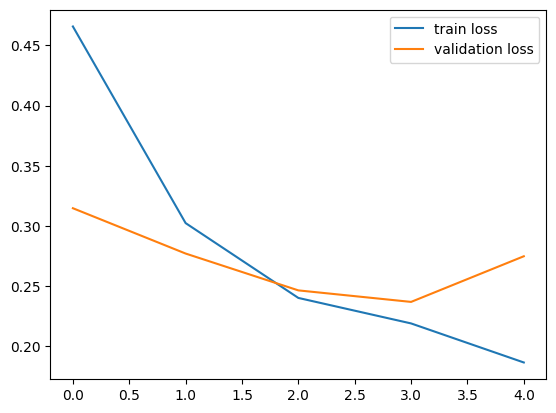

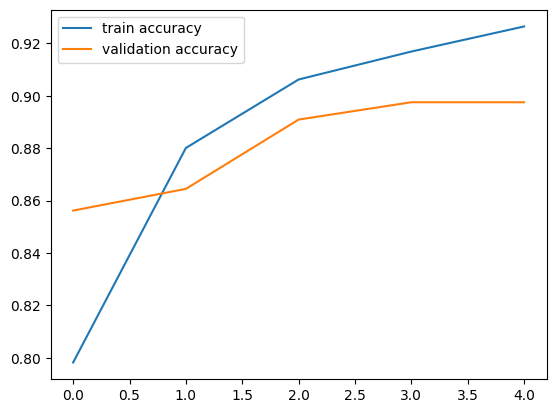

In [39]:
h = history

plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

plt.plot(h.history['accuracy'], label = 'train accuracy')
plt.plot(h.history['val_accuracy'], label = 'validation accuracy')
plt.legend()
plt.show()

Enter the path of Image:/content/data/with_mask/with_mask_1013.jpg


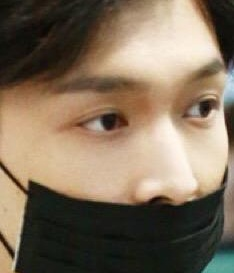

1/1 [==============================] - 0s 52ms/step
[[0.09591234 0.8723828 ]]
1
The person in the image is wearing a mask


In [44]:
input_img_path = input("Enter the path of Image:")

input_image = cv2.imread(input_img_path)
cv2_imshow(input_image)


input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Enter the path of Image:/content/data/with_mask/with_mask_1085.jpg


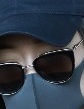

1/1 [==============================] - 0s 37ms/step
[[0.02324409 0.97446156]]
1
The person in the image is wearing a mask


In [47]:
input_img_path = input("Enter the path of Image:")

input_image = cv2.imread(input_img_path)
cv2_imshow(input_image)


input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /IMG_20221003_094353.jpg


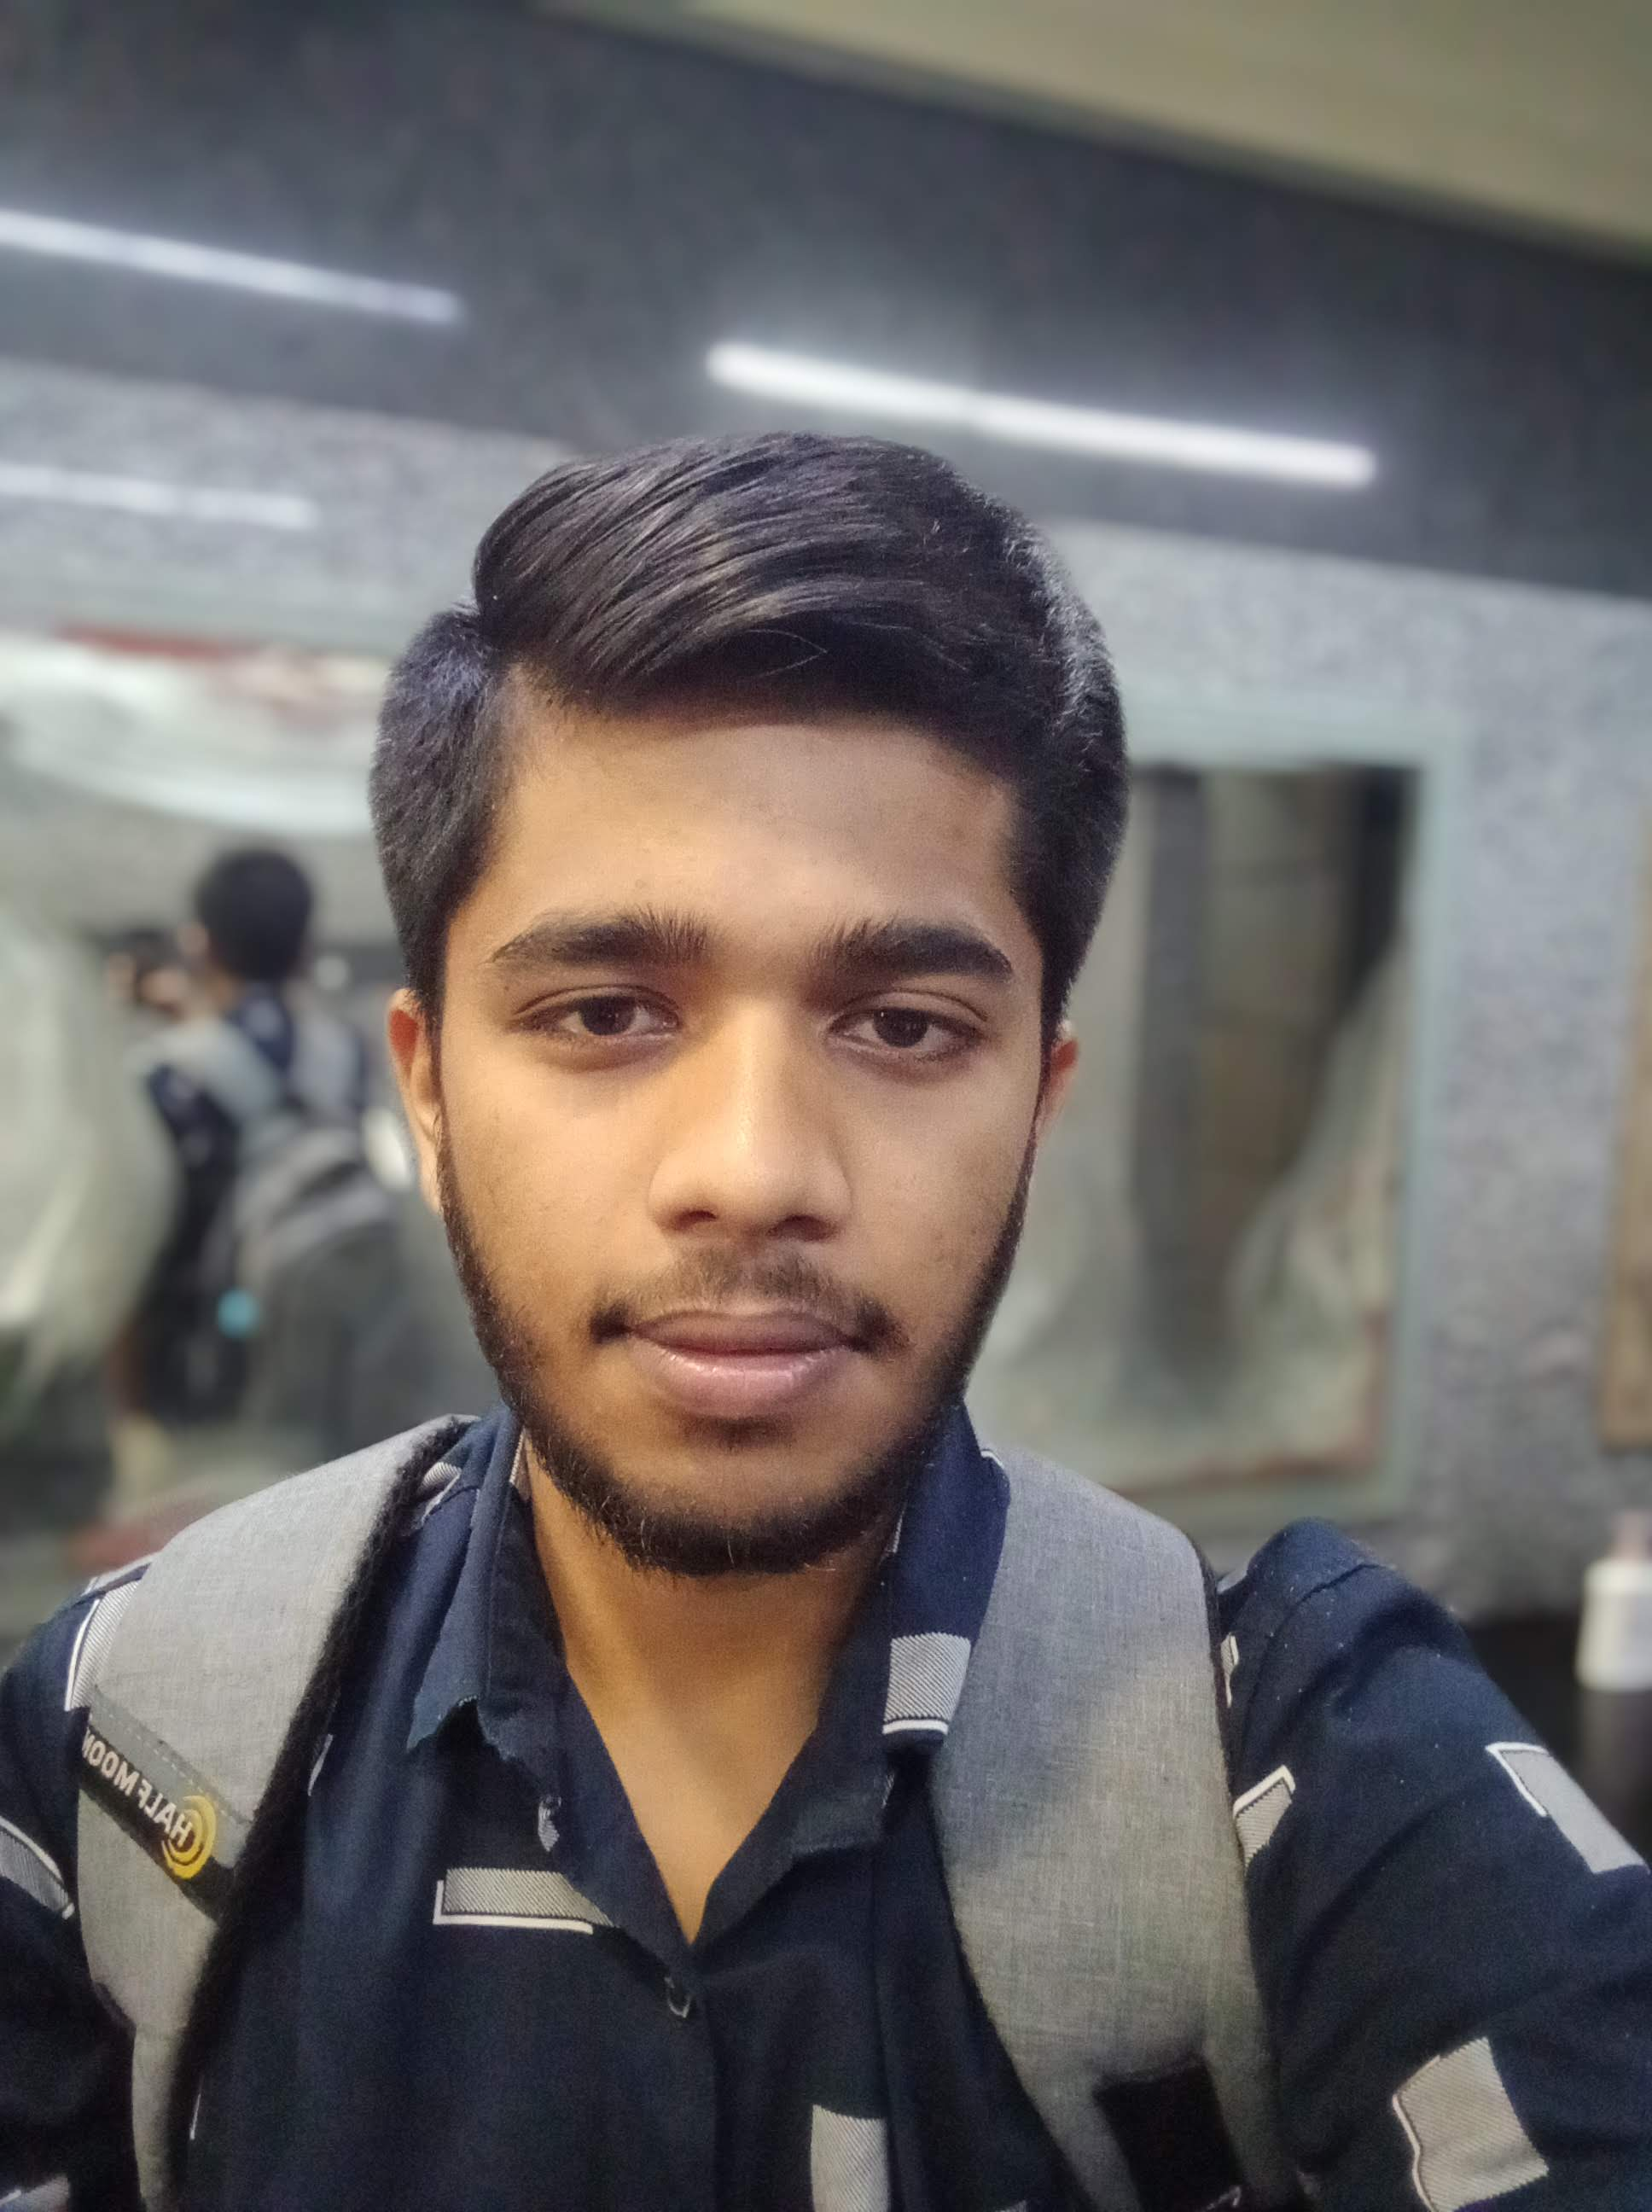

1/1 [==============================] - 0s 73ms/step
[[0.0201291 0.9846063]]
1
The person in the image is not wearing a mask


In [57]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')